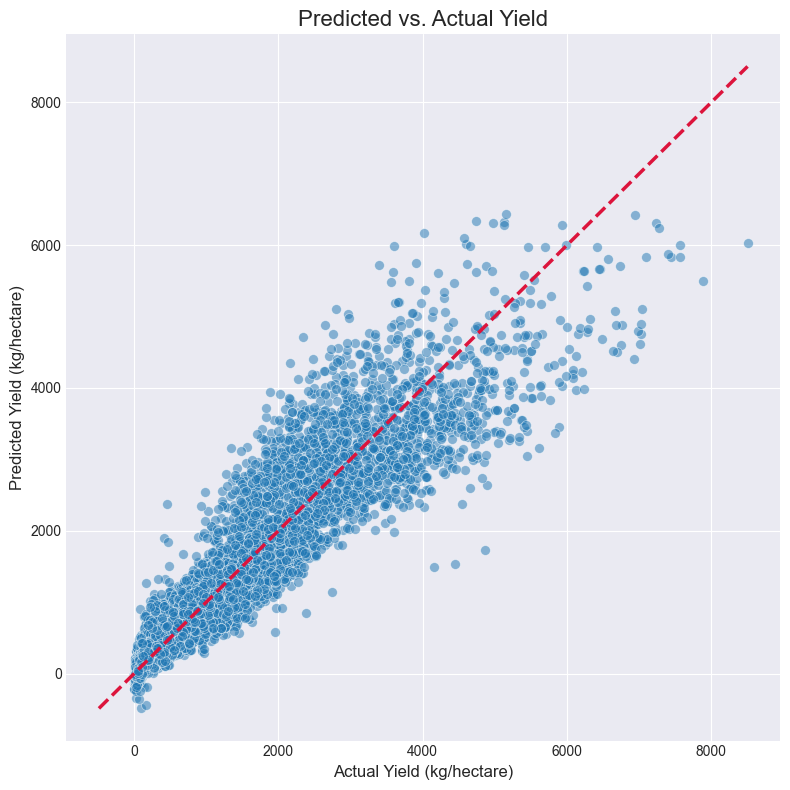

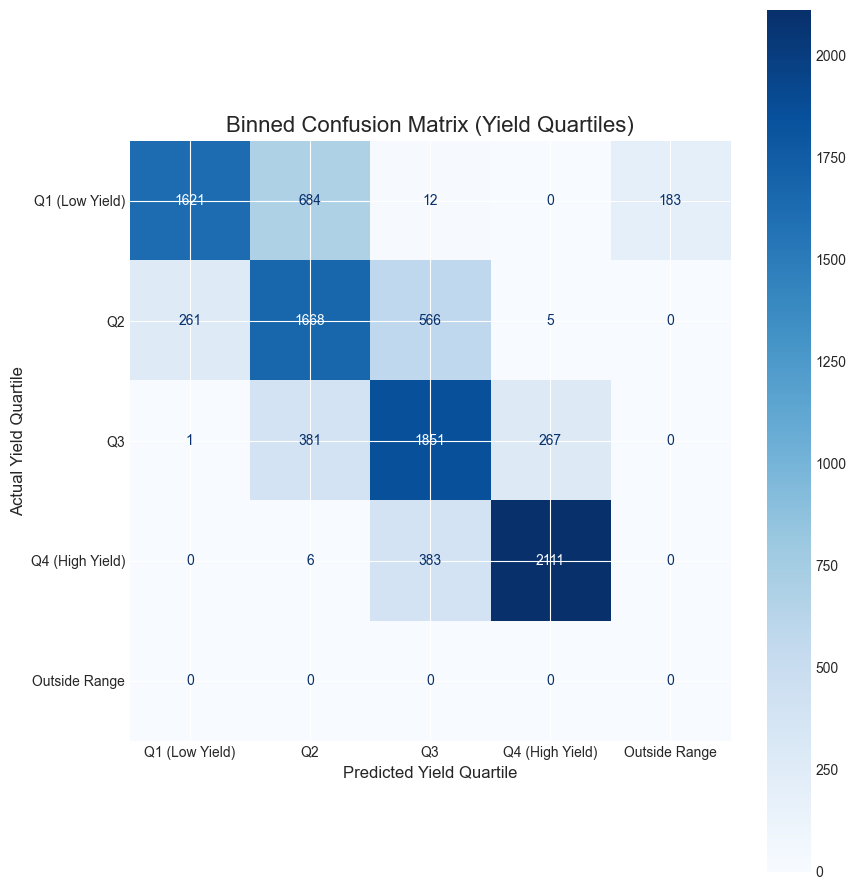

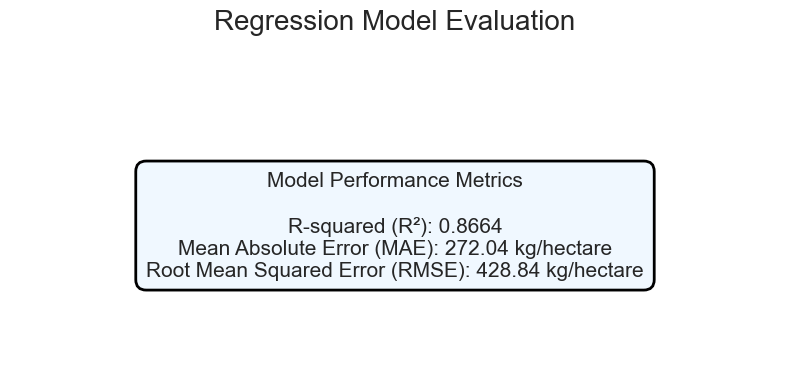

In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

data = pd.read_csv('indian_crop_data_realistic_v2.csv')
df = pd.DataFrame(data)[90000:100000]
X_test = df.drop(['Yield_kg_per_hectare'], axis=1)
Y_true = df.iloc[:, -1]
bst = lgb.Booster(model_file='yield_predictor_final_v2.txt')
X_test[["Soil_Type", "Crop_Type"]] = X_test[["Soil_Type", "Crop_Type"]].astype('category')

predictions = bst.predict(X_test)
#plot 1
plt.style.use('seaborn-v0_8-darkgrid')
fig1, ax1 = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=Y_true, y=predictions, alpha=0.5, ax=ax1, s=50)
max_val = max(Y_true.max(), predictions.max())
min_val = min(Y_true.min(), predictions.min())
ax1.plot([min_val, max_val], [min_val, max_val], color='crimson', linestyle='--', lw=2.5)
ax1.set_title('Predicted vs. Actual Yield', fontsize=16)
ax1.set_xlabel('Actual Yield (kg/hectare)', fontsize=12)
ax1.set_ylabel('Predicted Yield (kg/hectare)', fontsize=12)
fig1.tight_layout()
plt.savefig('predicted_vs_actual.png')


#plot 2
bins = pd.qcut(Y_true, q=4, labels=False, duplicates='drop')
bin_labels = [f'Q{i+1} (Low Yield)' if i==0 else f'Q{i+1} (High Yield)' if i==3 else f'Q{i+1}' for i in range(len(np.unique(bins)))]
bins = pd.qcut(Y_true, q=4, labels=bin_labels, duplicates='drop')
bin_edges = pd.qcut(Y_true, q=4, retbins=True, duplicates='drop')[1]
binned_predictions = pd.Series(pd.cut(predictions, bins=bin_edges, labels=bin_labels, include_lowest=True)).astype(object).fillna('Outside Range')
bins = bins.astype(object)
all_labels = bin_labels[:]
if 'Outside Range' in binned_predictions.unique():
    if 'Outside Range' not in all_labels:
        all_labels.append('Outside Range')
cm = confusion_matrix(bins, binned_predictions, labels=all_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
fig3, ax3 = plt.subplots(figsize=(9, 9))
disp.plot(ax=ax3, cmap='Blues', values_format='d')
ax3.set_title('Binned Confusion Matrix (Yield Quartiles)', fontsize=16)
ax3.set_xlabel('Predicted Yield Quartile', fontsize=12)
ax3.set_ylabel('Actual Yield Quartile', fontsize=12)
fig3.tight_layout()
plt.savefig('binned_confusion_matrix.png')

# Plot3
r2 = r2_score(Y_true, predictions)
mae = mean_absolute_error(Y_true, predictions)
rmse = np.sqrt(mean_squared_error(Y_true, predictions))
metrics_text = (
    f"Model Performance Metrics\n\n"
    f"R-squared (R²): {r2:.4f}\n"
    f"Mean Absolute Error (MAE): {mae:.2f} kg/hectare\n"
    f"Root Mean Squared Error (RMSE): {rmse:.2f} kg/hectare"
)
fig4, ax4 = plt.subplots(figsize=(8, 4))
ax4.axis('off')
ax4.text(0.5, 0.5, metrics_text, ha='center', va='center', fontsize=15,
         bbox=dict(boxstyle="round,pad=0.5", fc='aliceblue', ec='black', lw=2))
fig4.suptitle('Regression Model Evaluation', fontsize=20)
fig4.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('model_metrics.png')

plt.show()

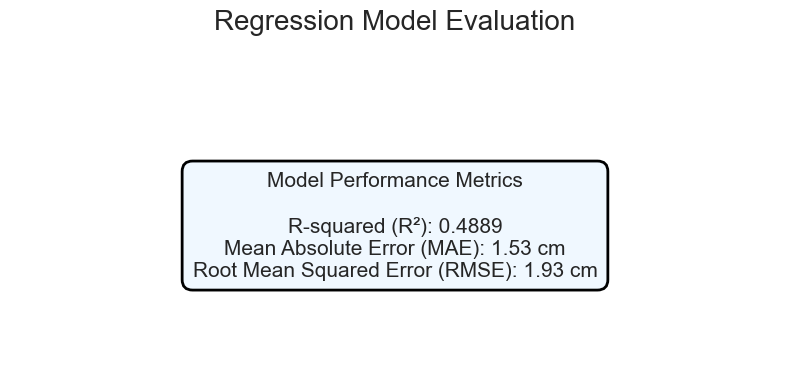

In [19]:


data = pd.read_csv('indian_crop_data_realistic_v2.csv')
df = pd.DataFrame(data)[90000:100000]
X_test = df.drop(['Average_Planting_Depth_in_cm'], axis=1)
Y_true = df['Average_Planting_Depth_in_cm']

bst = lgb.Booster(model_file='planting_depth_model_final.txt')
X_test[["Soil_Type", "Crop_Type"]] = X_test[["Soil_Type", "Crop_Type"]].astype('category')

predictions = bst.predict(X_test)



r2 = r2_score(Y_true, predictions)
mae = mean_absolute_error(Y_true, predictions)
rmse = np.sqrt(mean_squared_error(Y_true, predictions))
metrics_text = (
    f"Model Performance Metrics\n\n"
    f"R-squared (R²): {r2:.4f}\n"
    f"Mean Absolute Error (MAE): {mae:.2f} cm\n"
    f"Root Mean Squared Error (RMSE): {rmse:.2f} cm"
)
fig4, ax4 = plt.subplots(figsize=(8, 4))
ax4.axis('off')
ax4.text(0.5, 0.5, metrics_text, ha='center', va='center', fontsize=15,
         bbox=dict(boxstyle="round,pad=0.5", fc='aliceblue', ec='black', lw=2))
fig4.suptitle('Regression Model Evaluation', fontsize=20)
fig4.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('model_metrics_depth.png')

plt.show()